<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/08-Random-Forests/02_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

A tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/csv_files/rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal','Density']

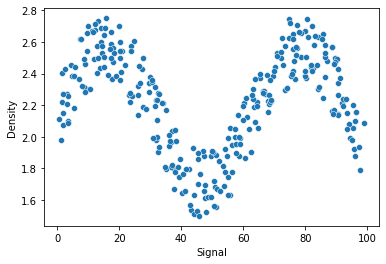

In [6]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [7]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_model = LinearRegression()

In [12]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
lr_preds = lr_model.predict(X_test)

In [14]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [17]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [18]:
signal_range = np.arange(0,100)

In [19]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [20]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [21]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

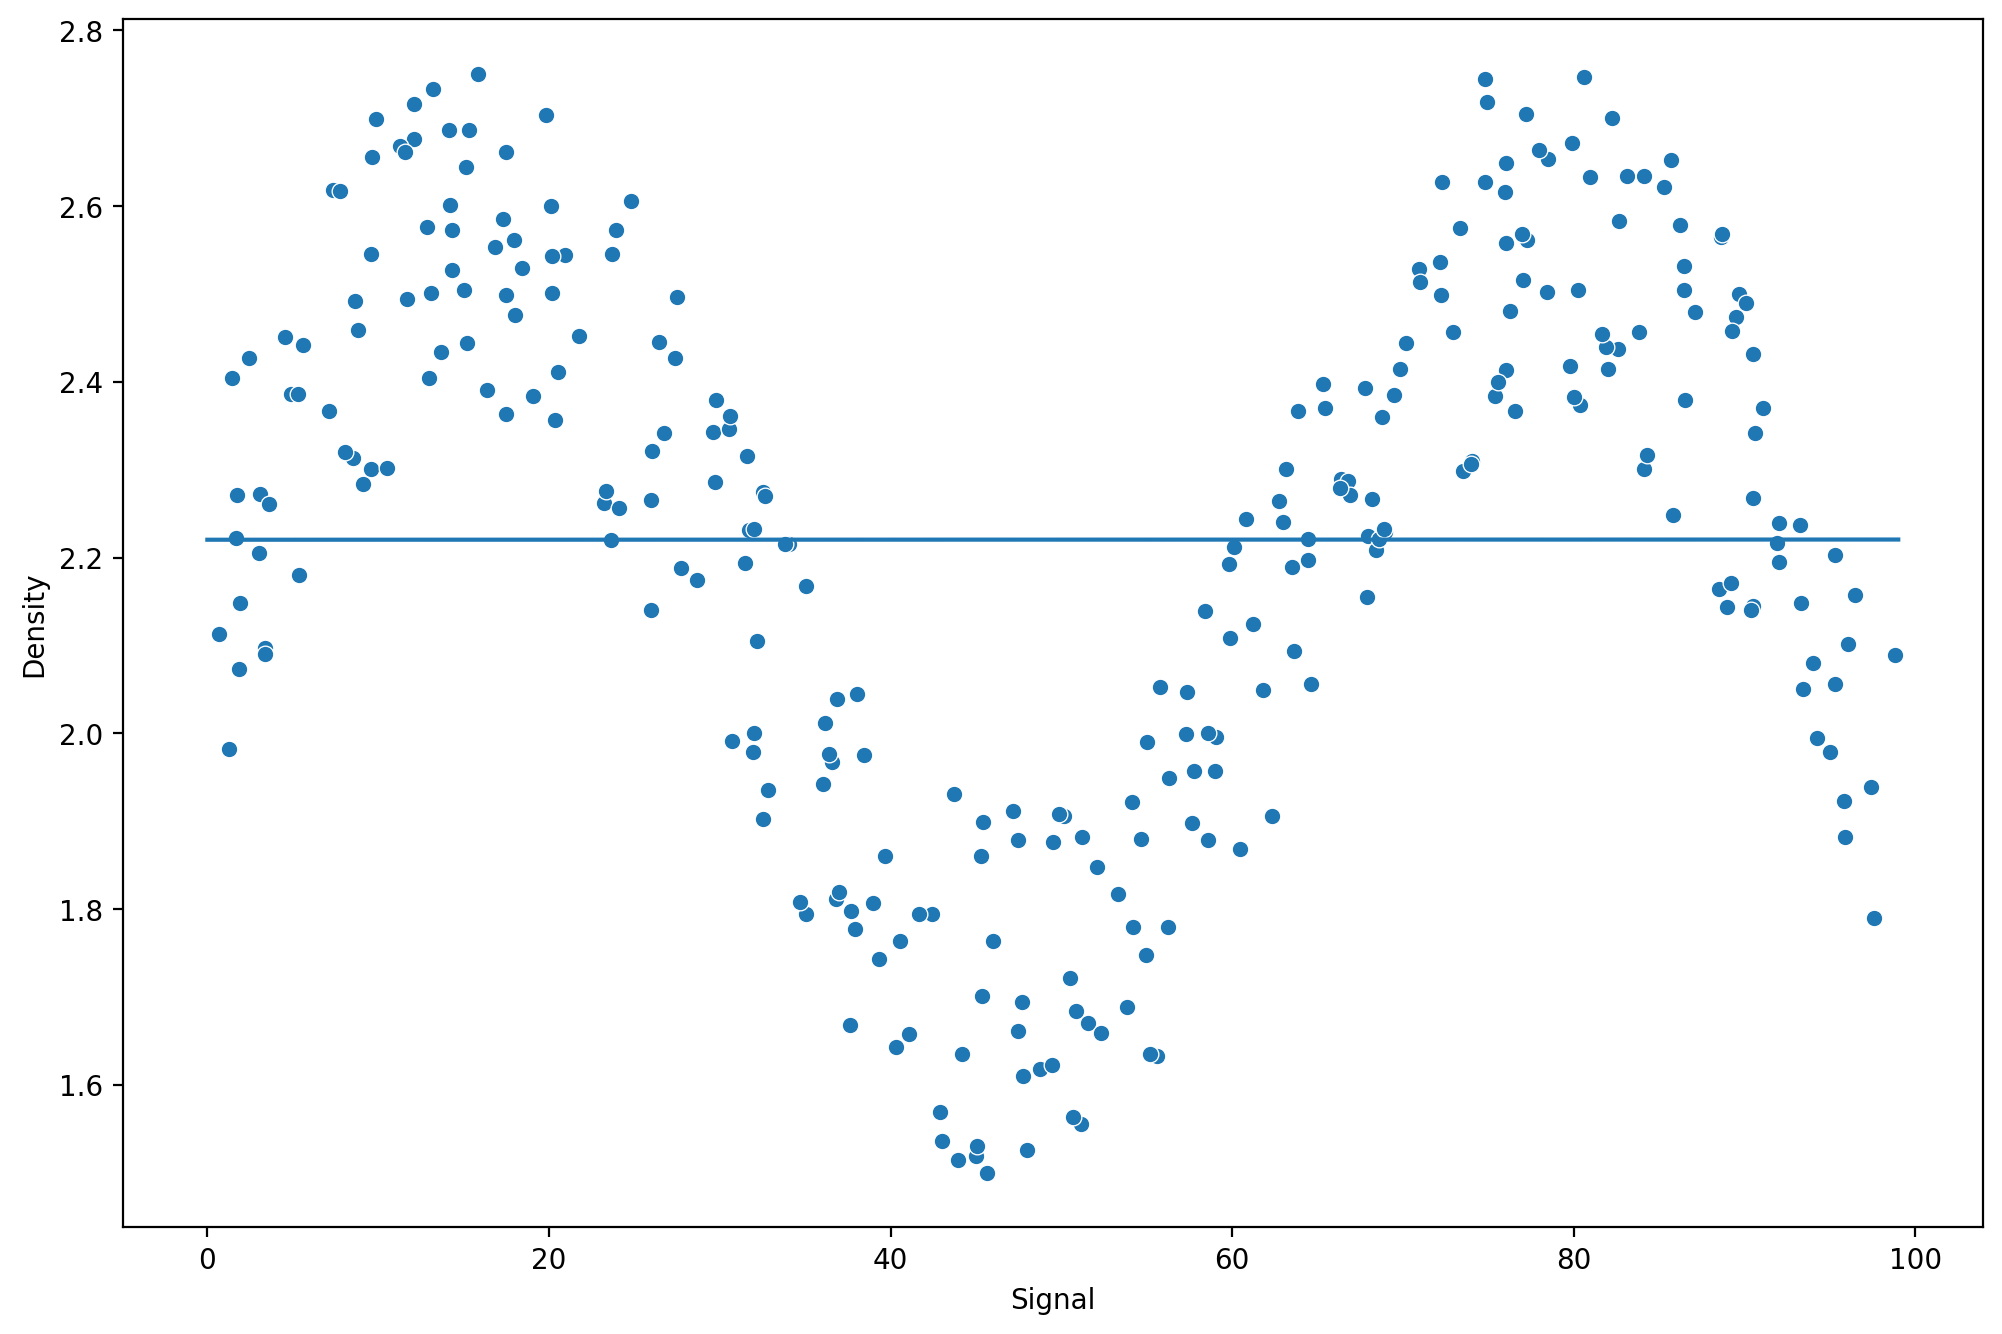

In [22]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_preds)

In [23]:
def run_model(model,X_train,y_train,X_test,y_test):

  # Fit model training
  model.fit(X_train,y_train)

  # Get metrics
  preds = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test,preds))
  mae = mean_absolute_error(y_test,preds)
  print(f'MAE: {mae}')
  print(f'RMSE: {rmse}')

  #Plot results model signal range
  signal_range = np.arange(1,100)
  signal_preds = model.predict(signal_range.reshape(-1,1))

  plt.figure(figsize=(12,8),dpi=200)
  sns.scatterplot(x='Signal',y='Density',data=df,color='black')

  plt.plot(signal_range,signal_preds)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


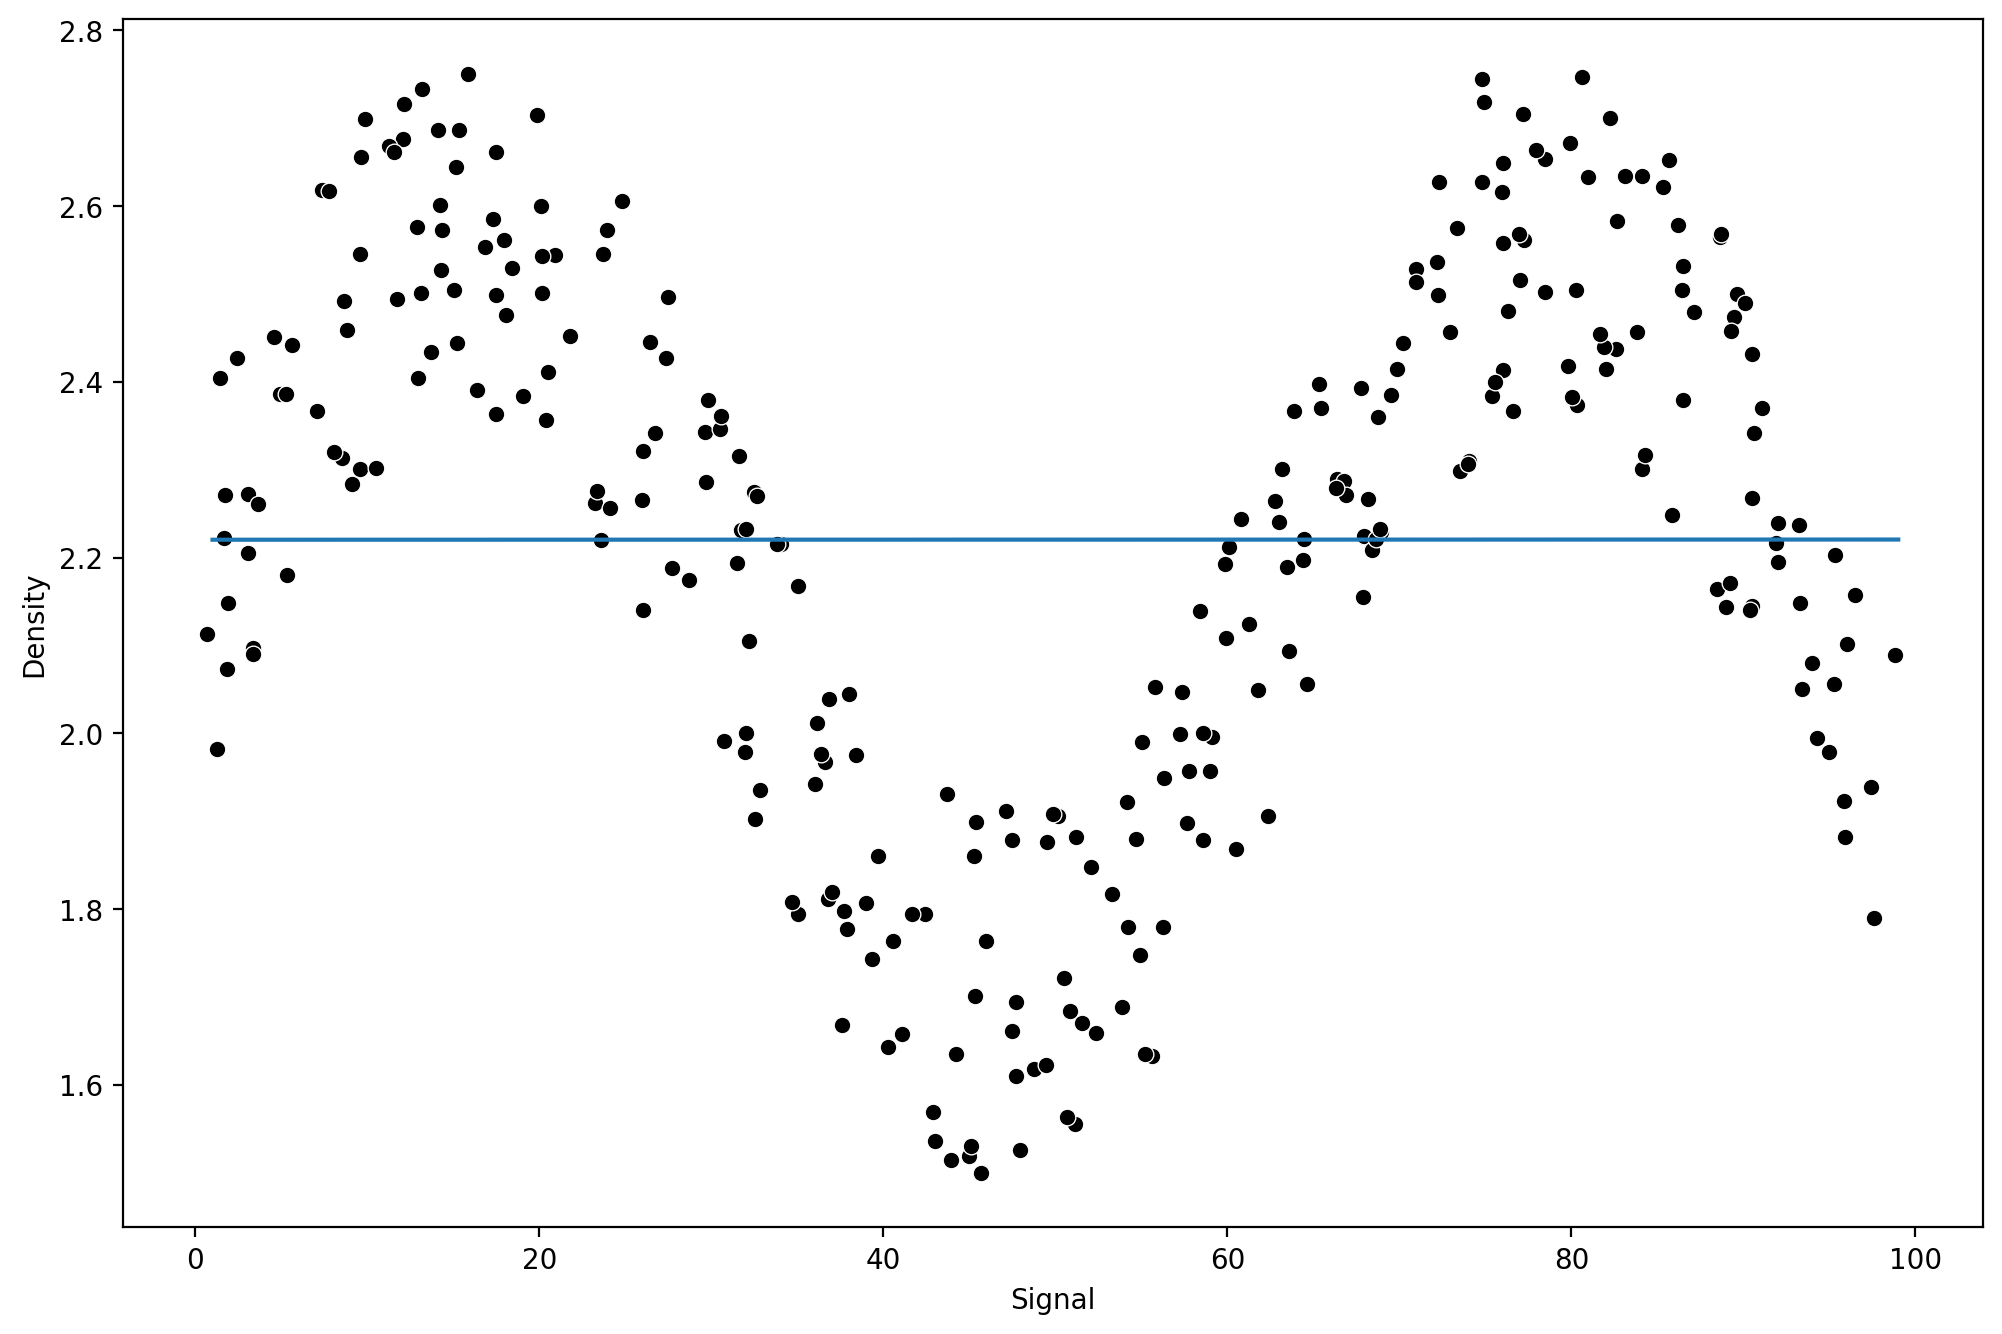

In [24]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

---

# Polynomial Regression

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [26]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MAE: 0.22903105443511335
RMSE: 0.2817309563725596


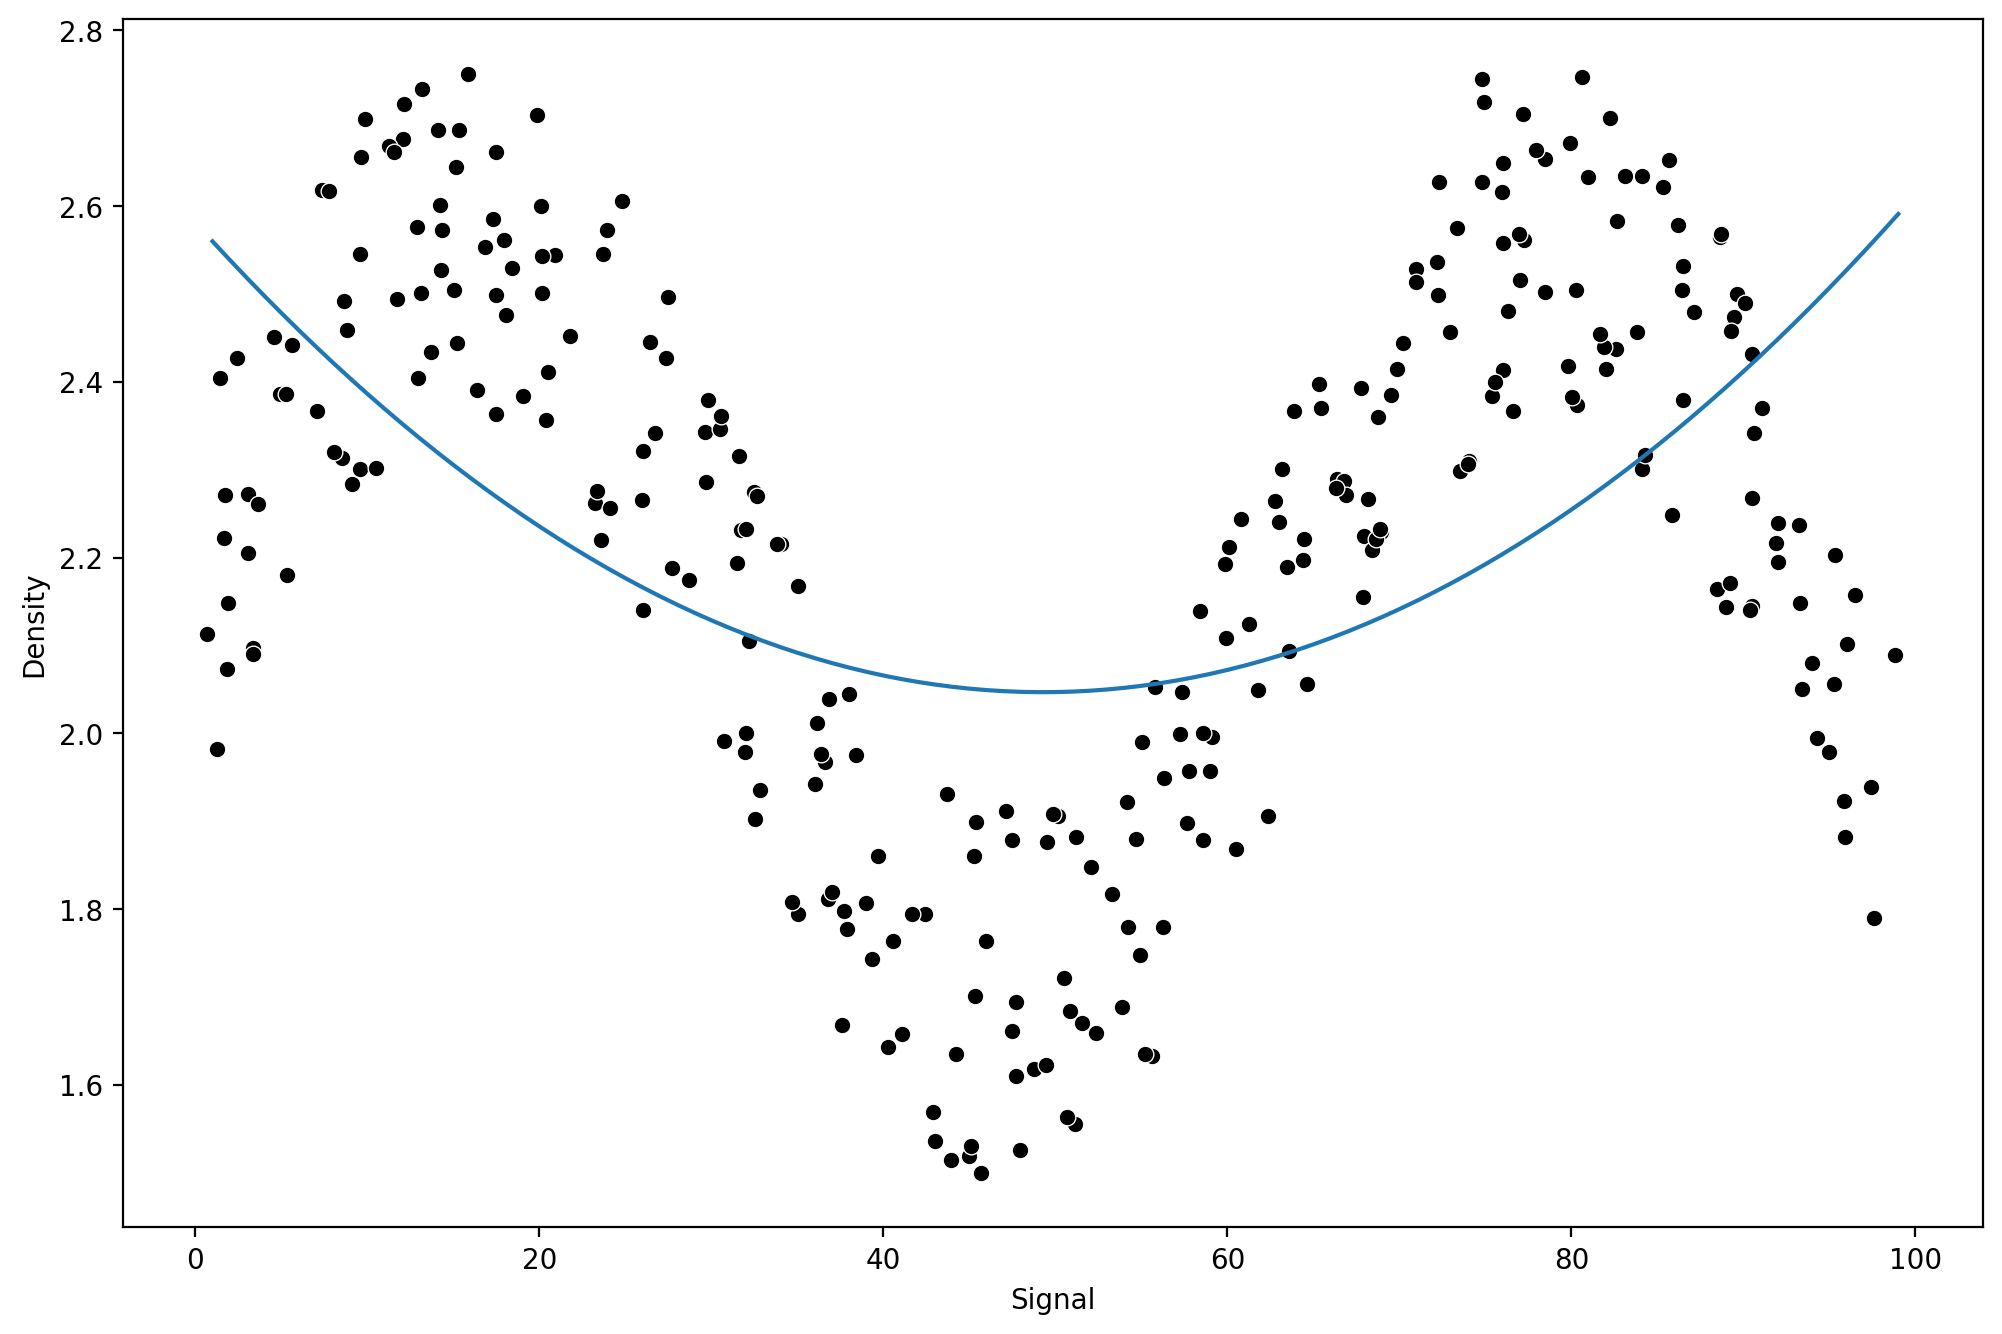

In [27]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [28]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE: 0.11969122389484065
RMSE: 0.1380744906136982


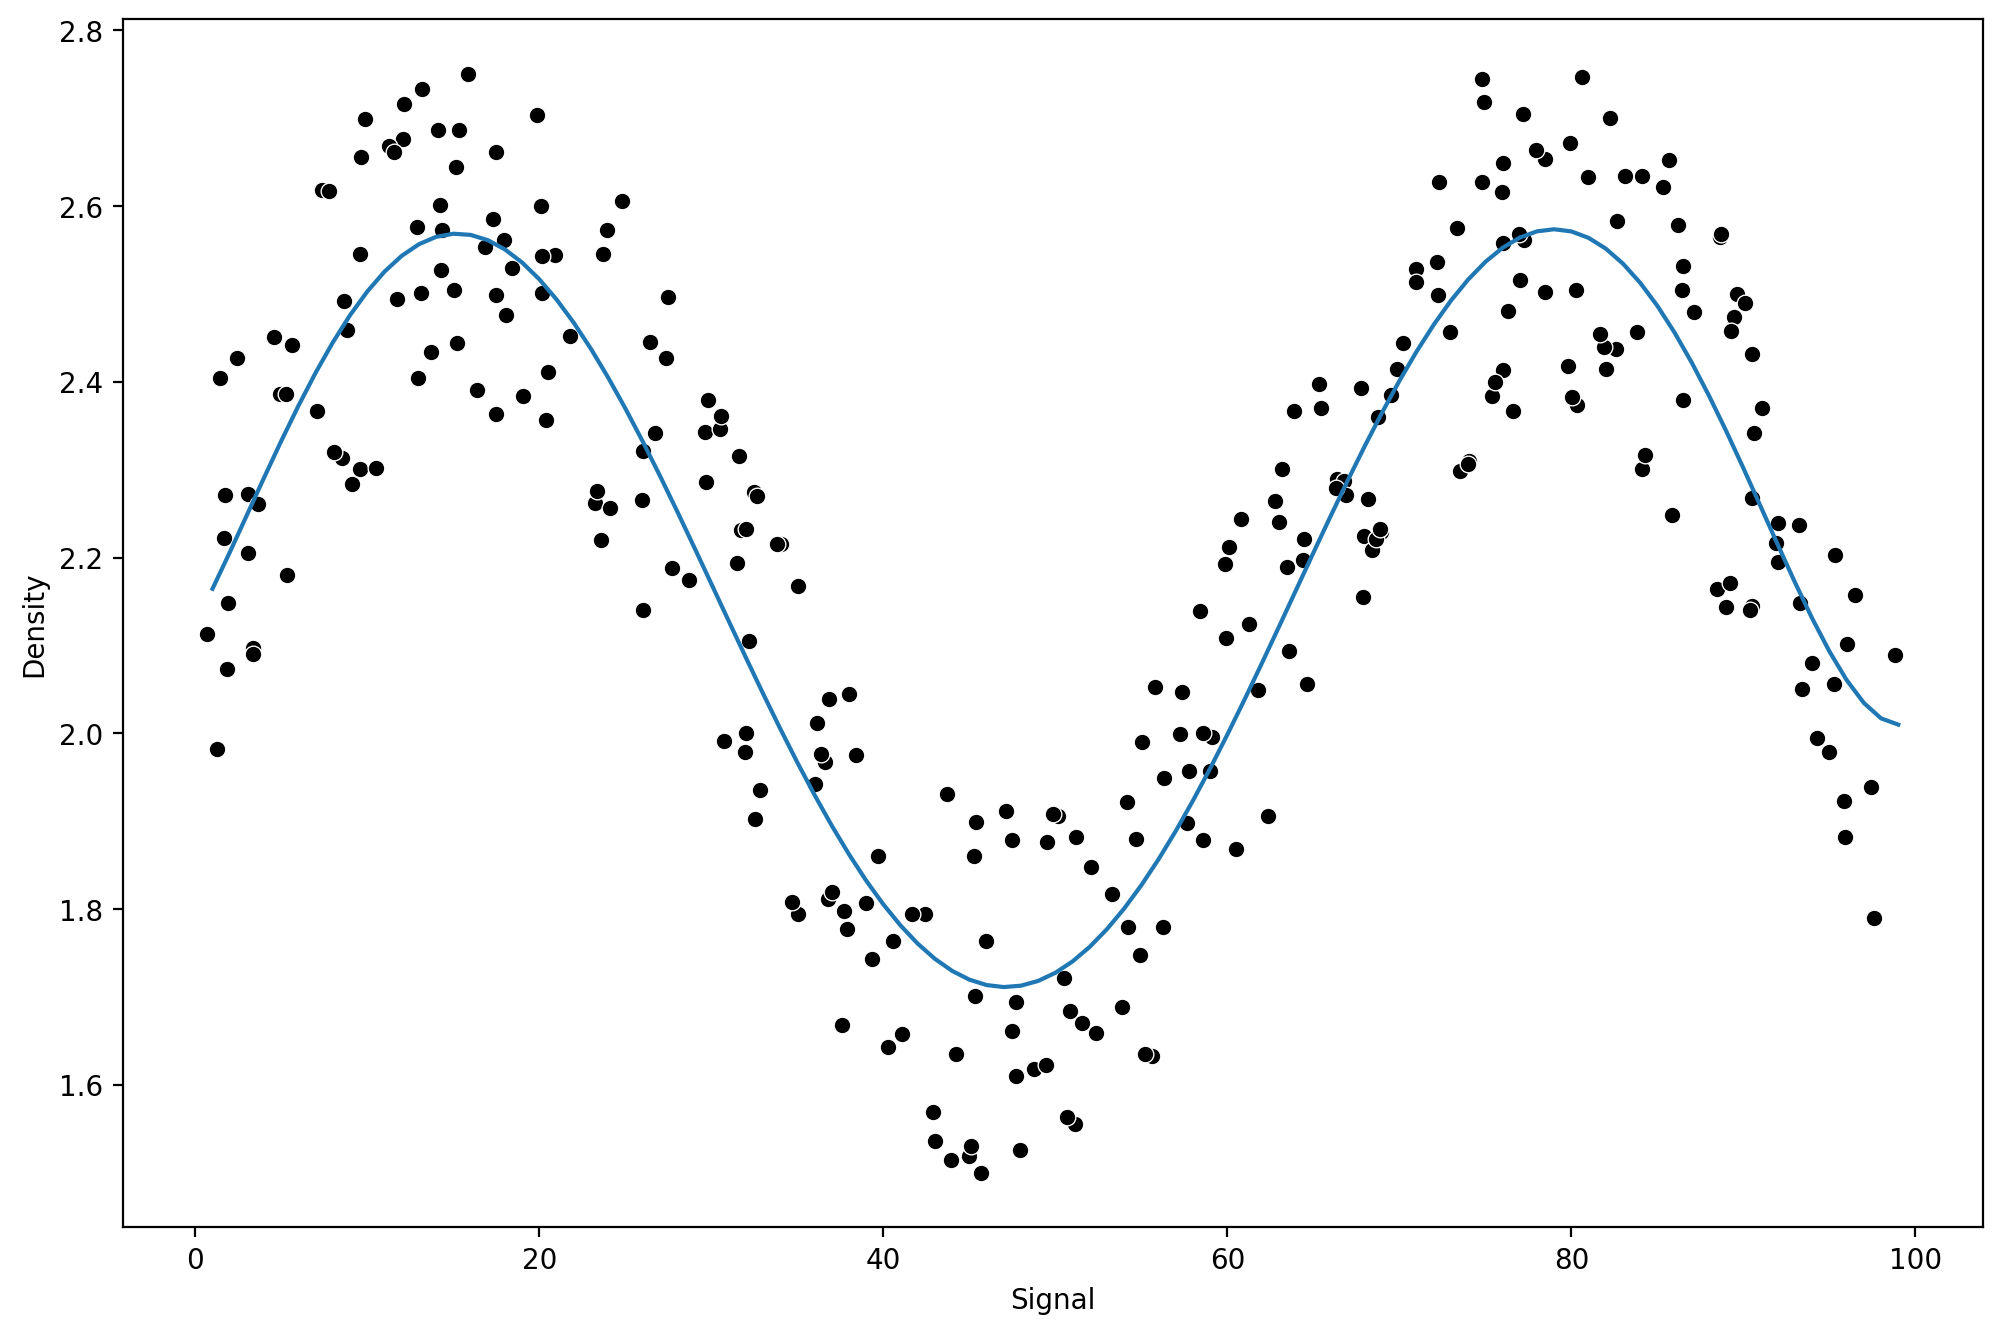

In [29]:
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


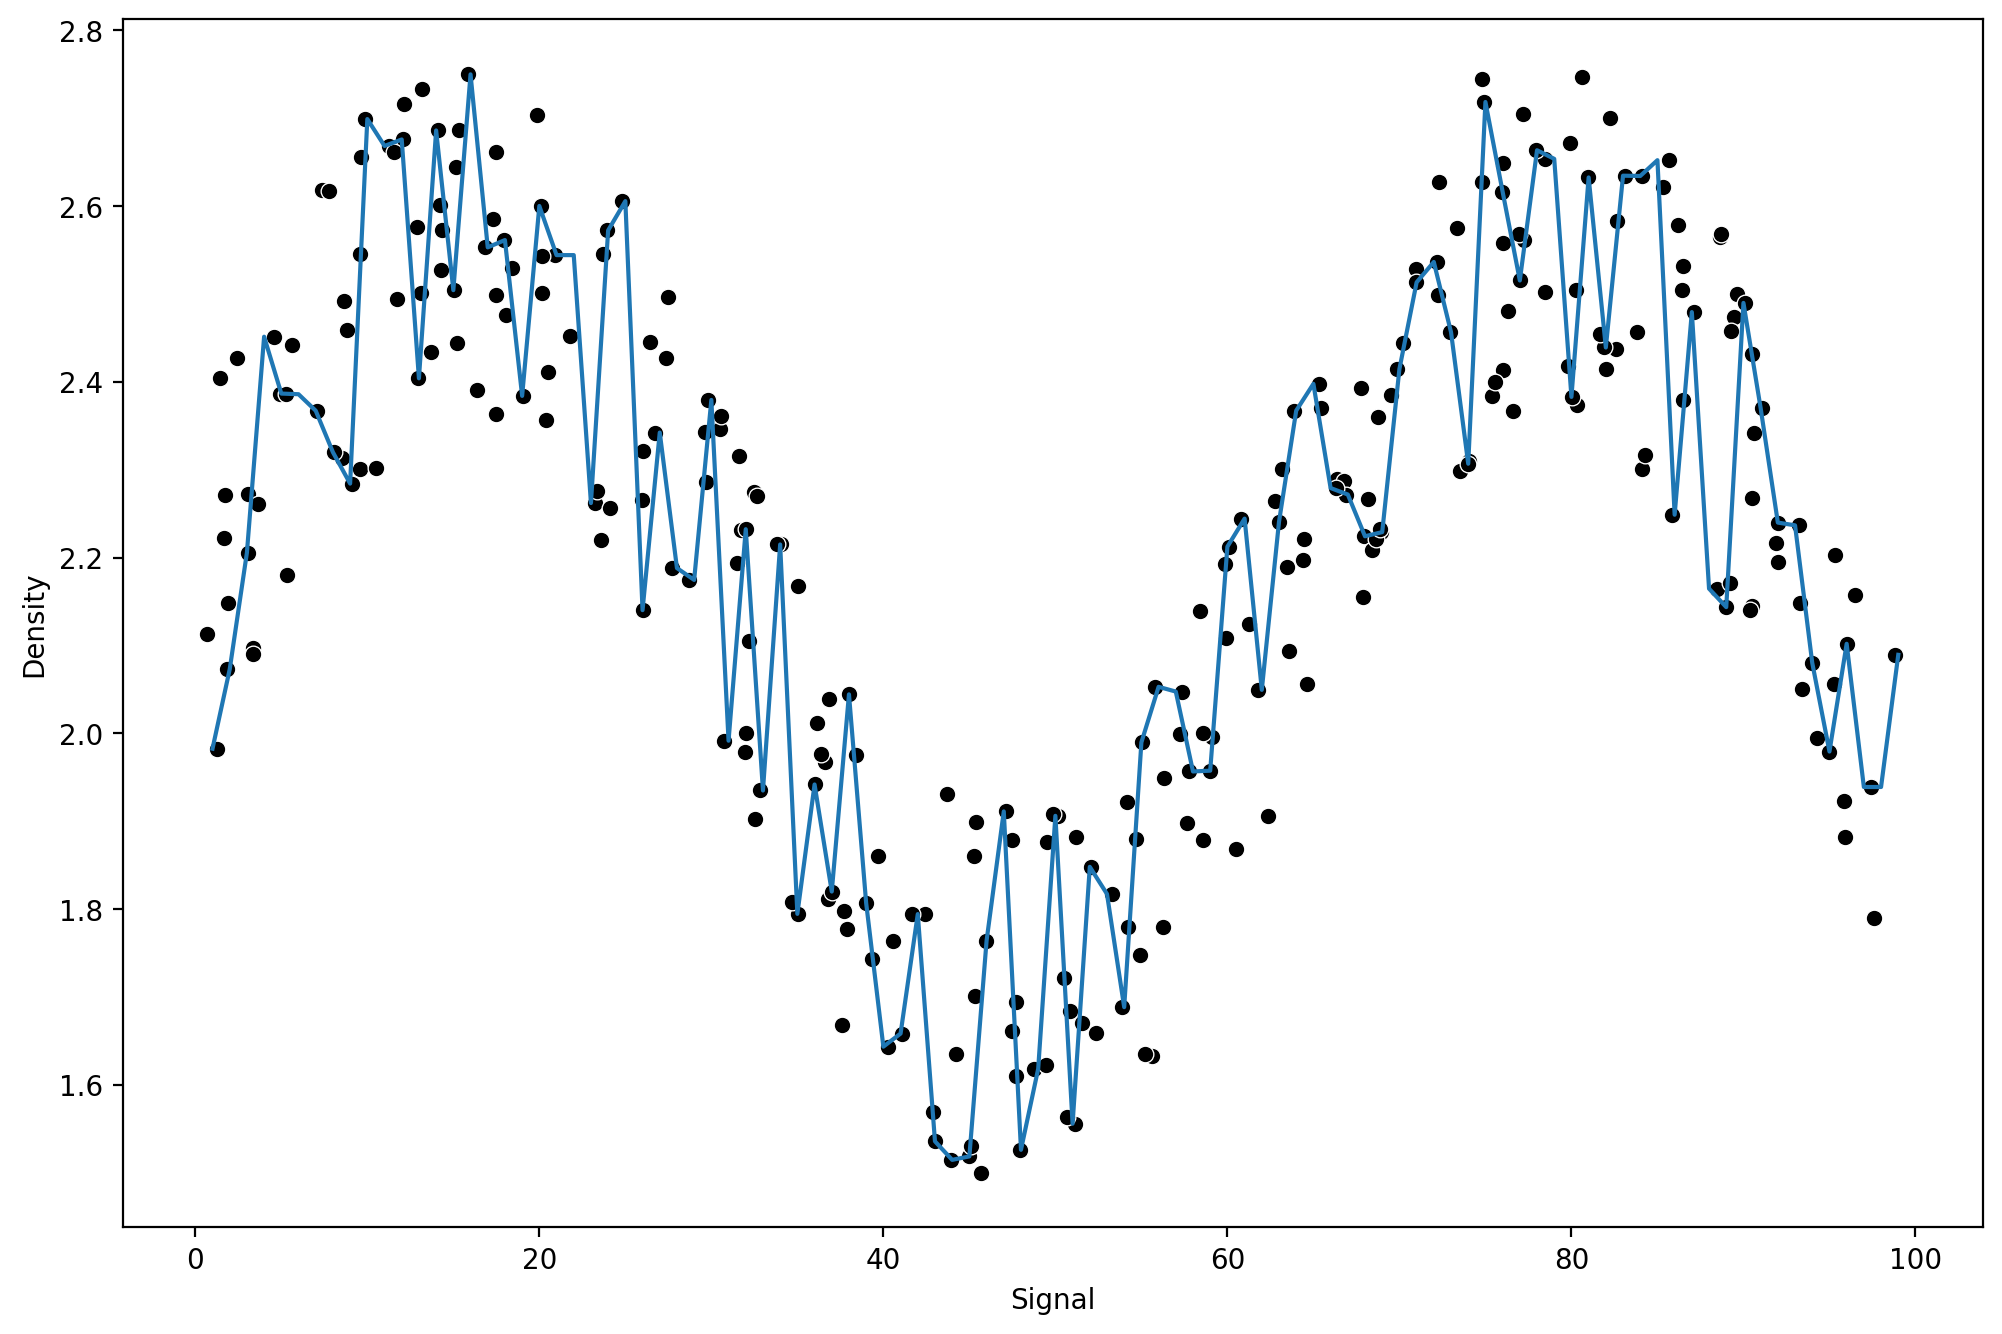

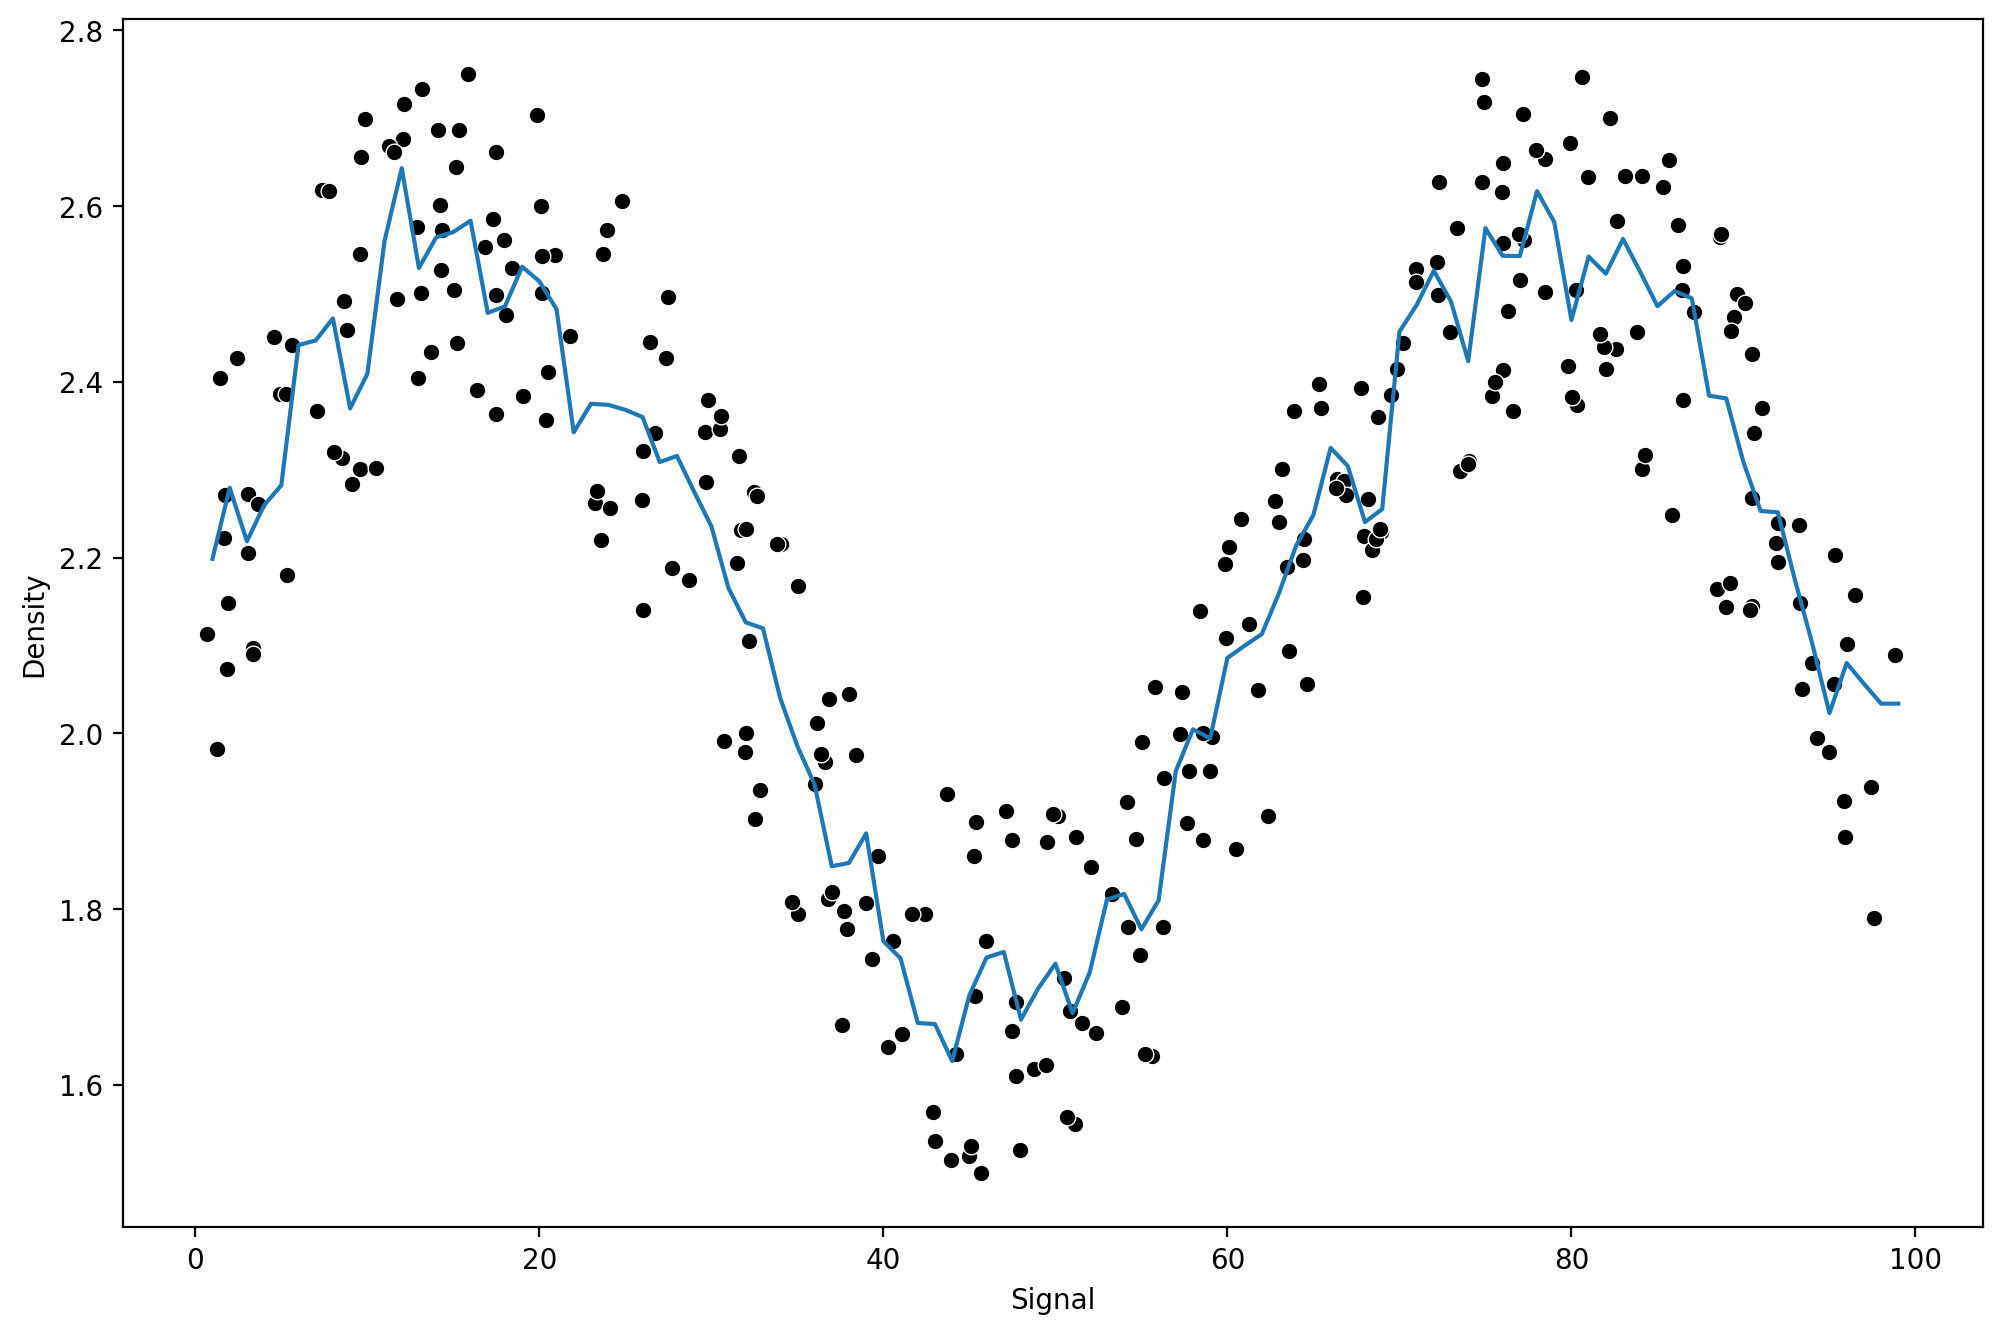

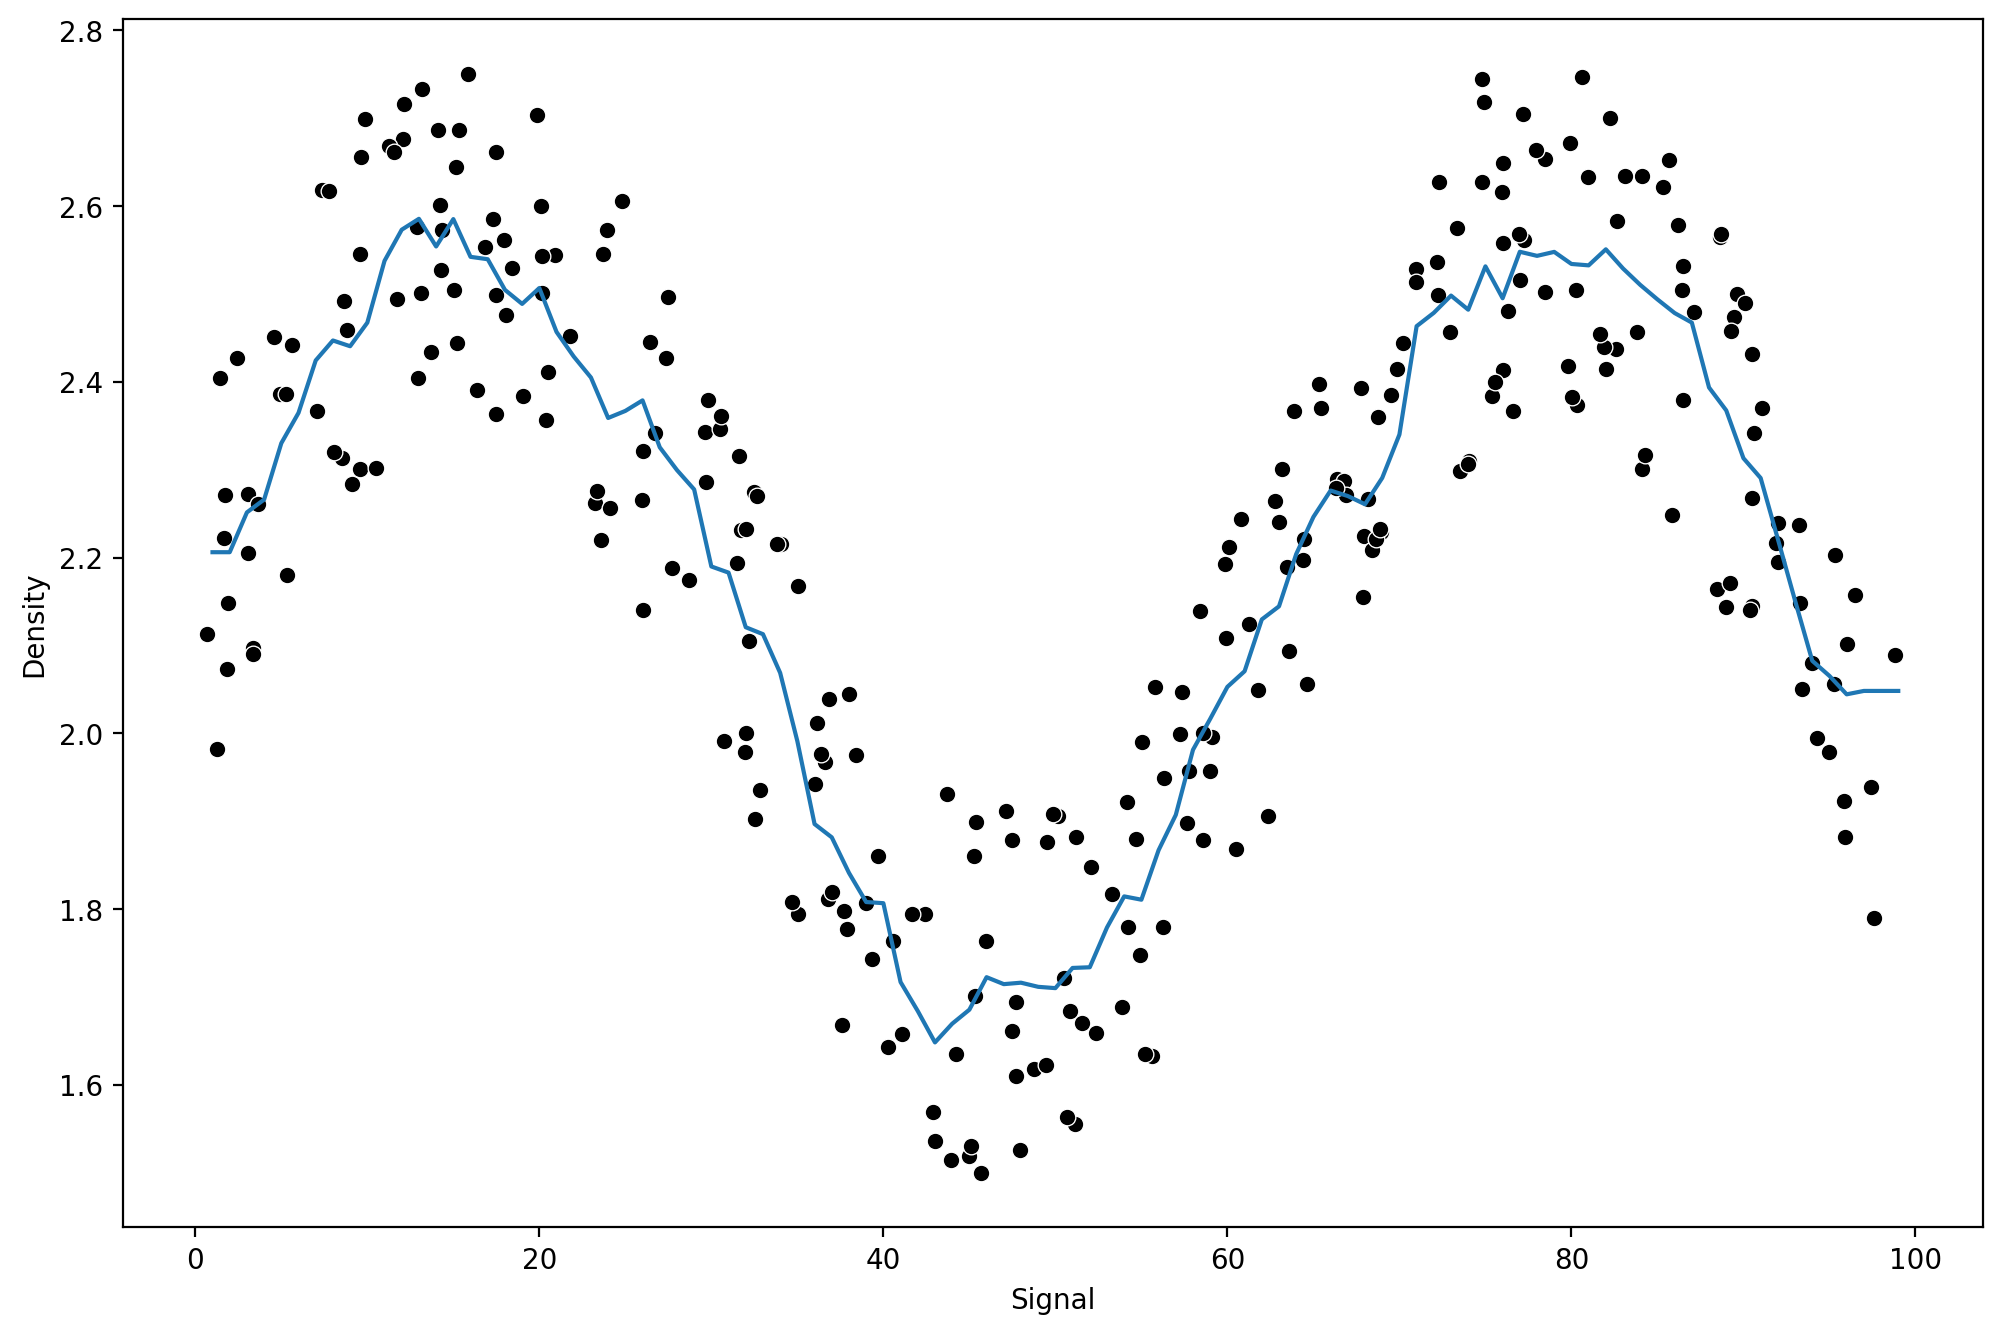

In [32]:
k_values = [1,5,10]

for n in k_values:
  model = KNeighborsRegressor(n)

  run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


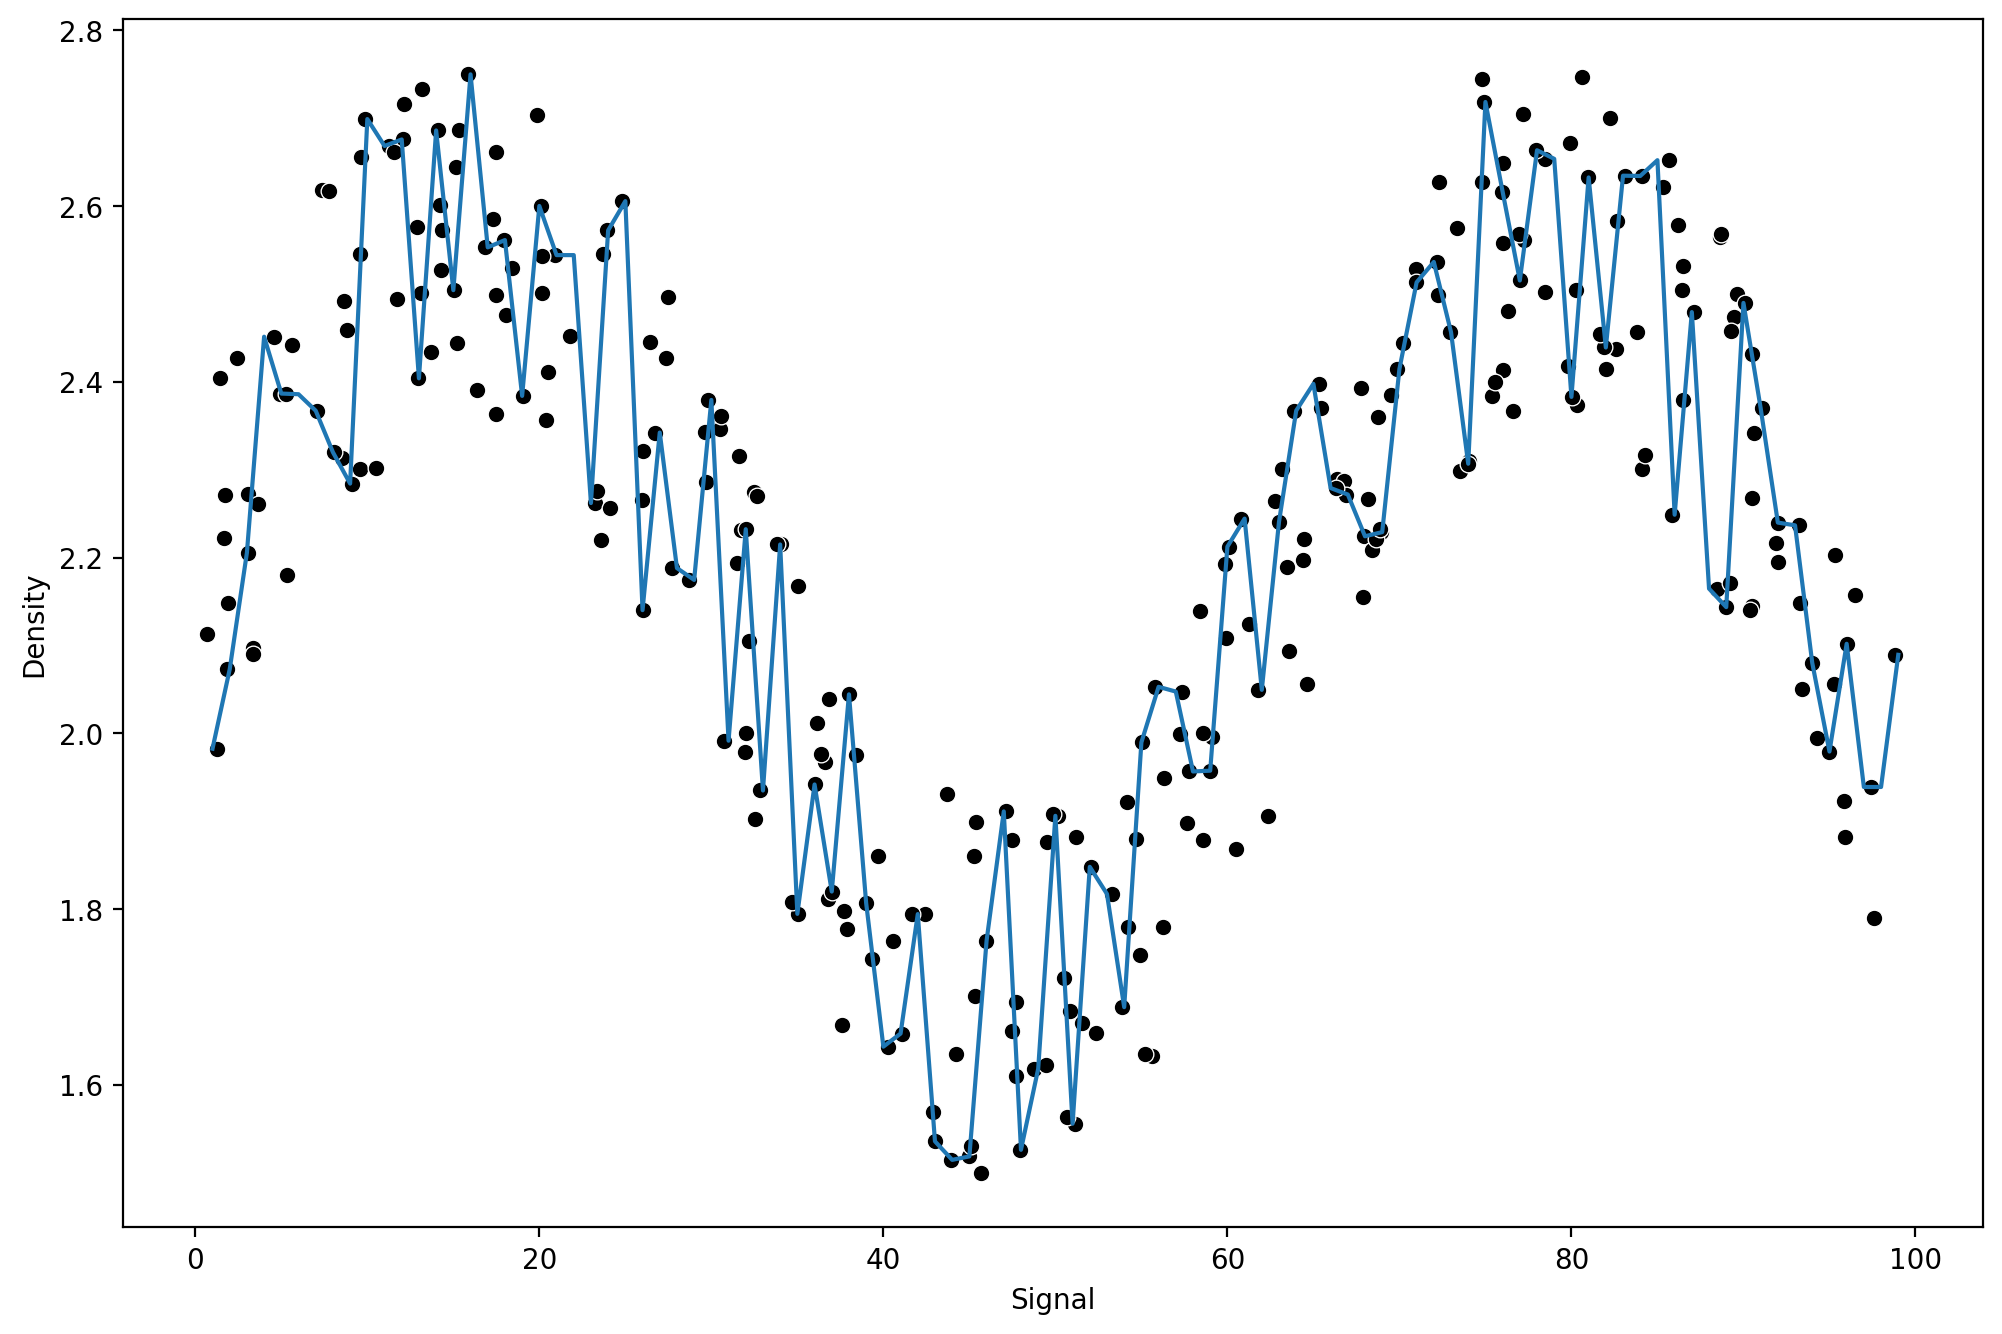

In [34]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

----

## Support Vector Regression

In [35]:
from sklearn.svm import SVR

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
              'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

MAE: 0.10854210121345335
RMSE: 0.12646999302044373


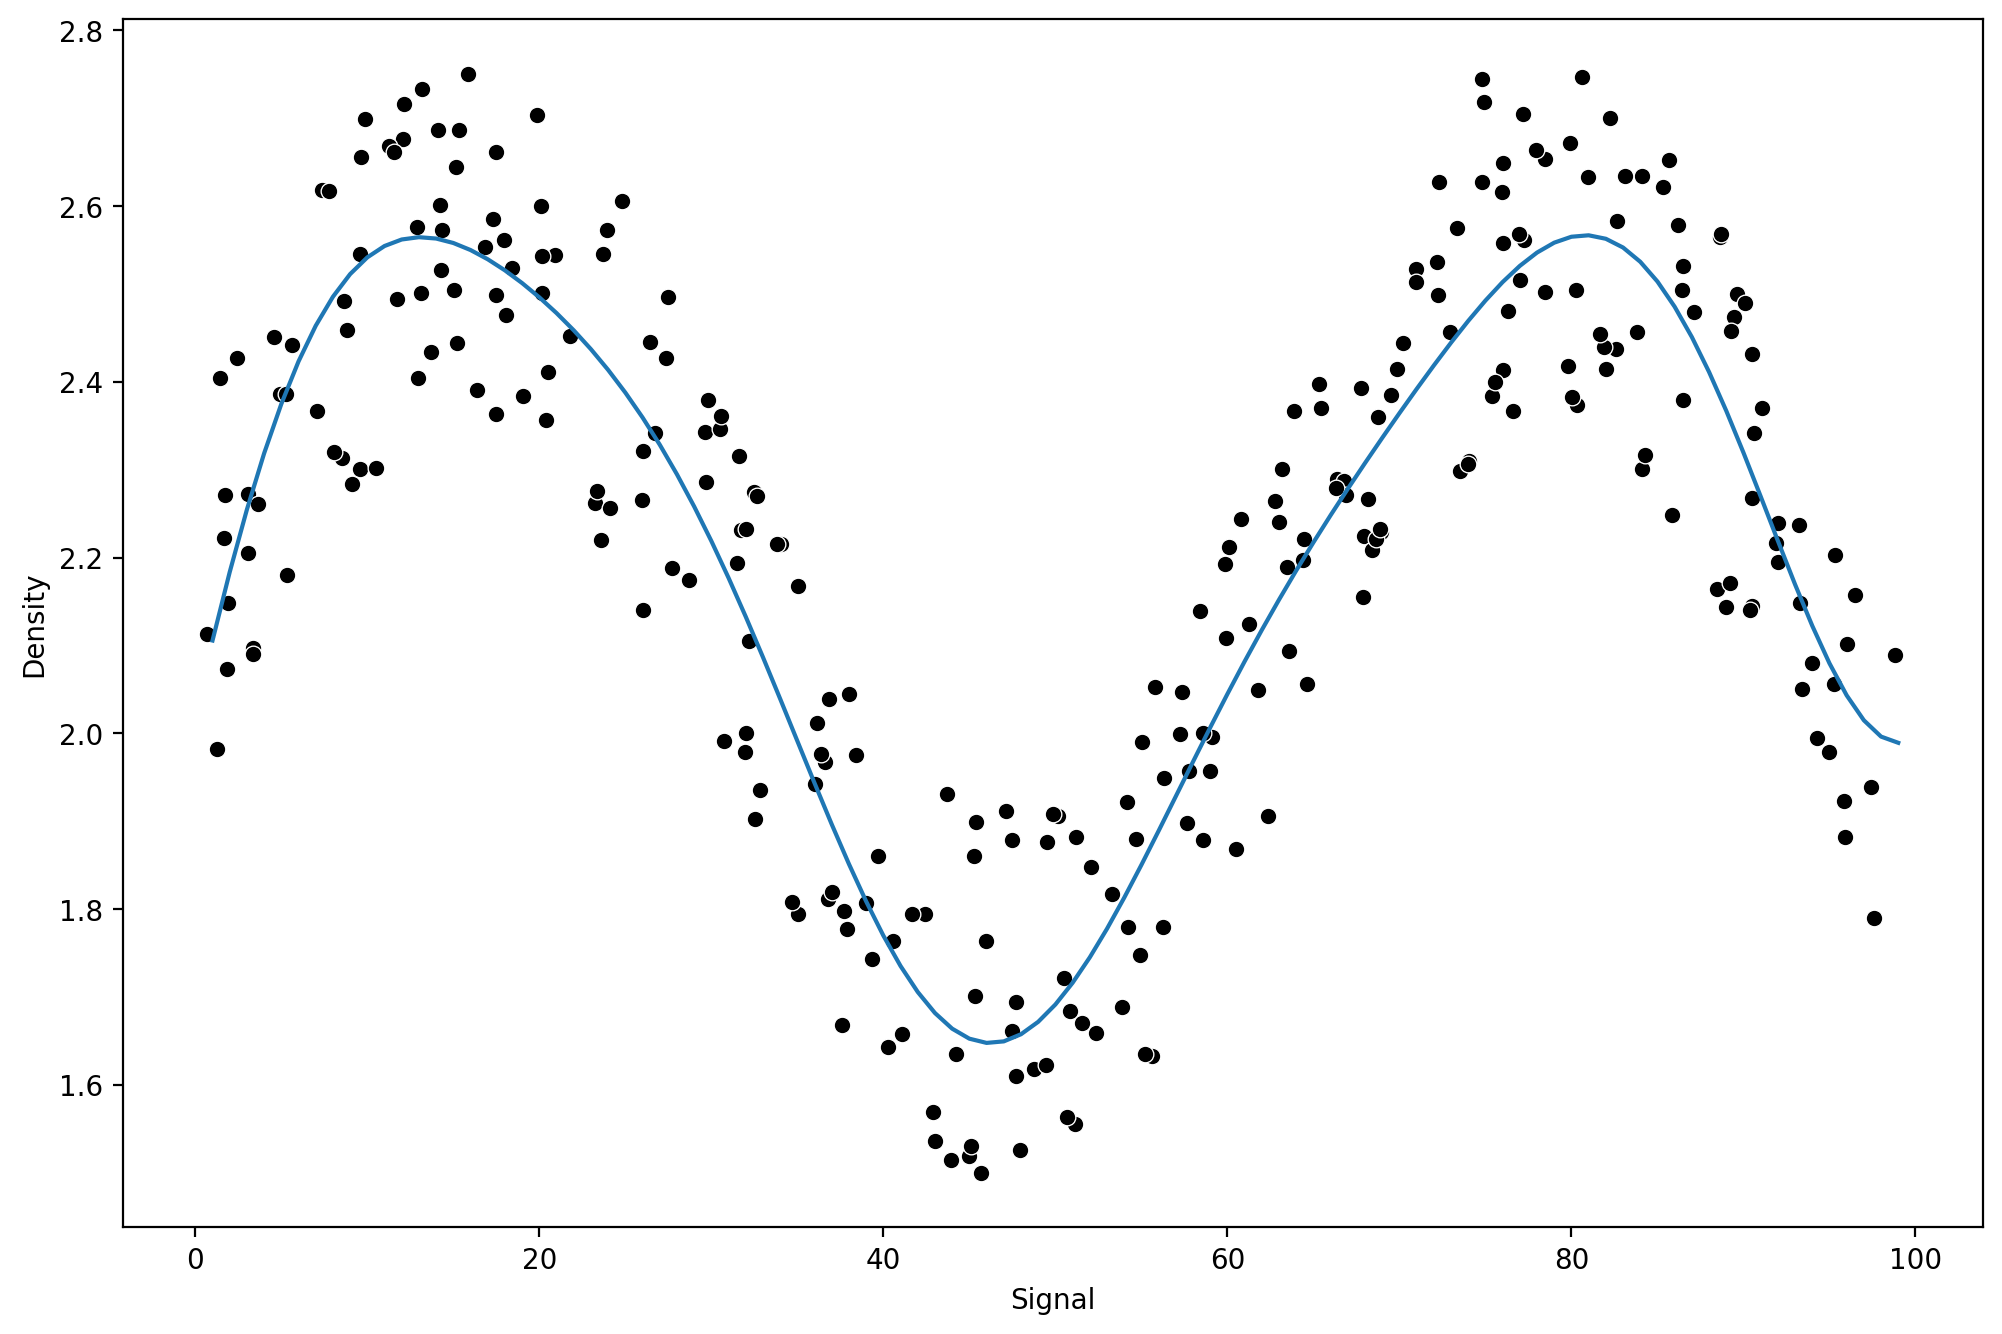

In [39]:
run_model(grid,X_train,y_train,X_test,y_test)

---

## Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rfr = RandomForestRegressor(n_estimators=25)

MAE: 0.1168664850603361
RMSE: 0.13941782377201453


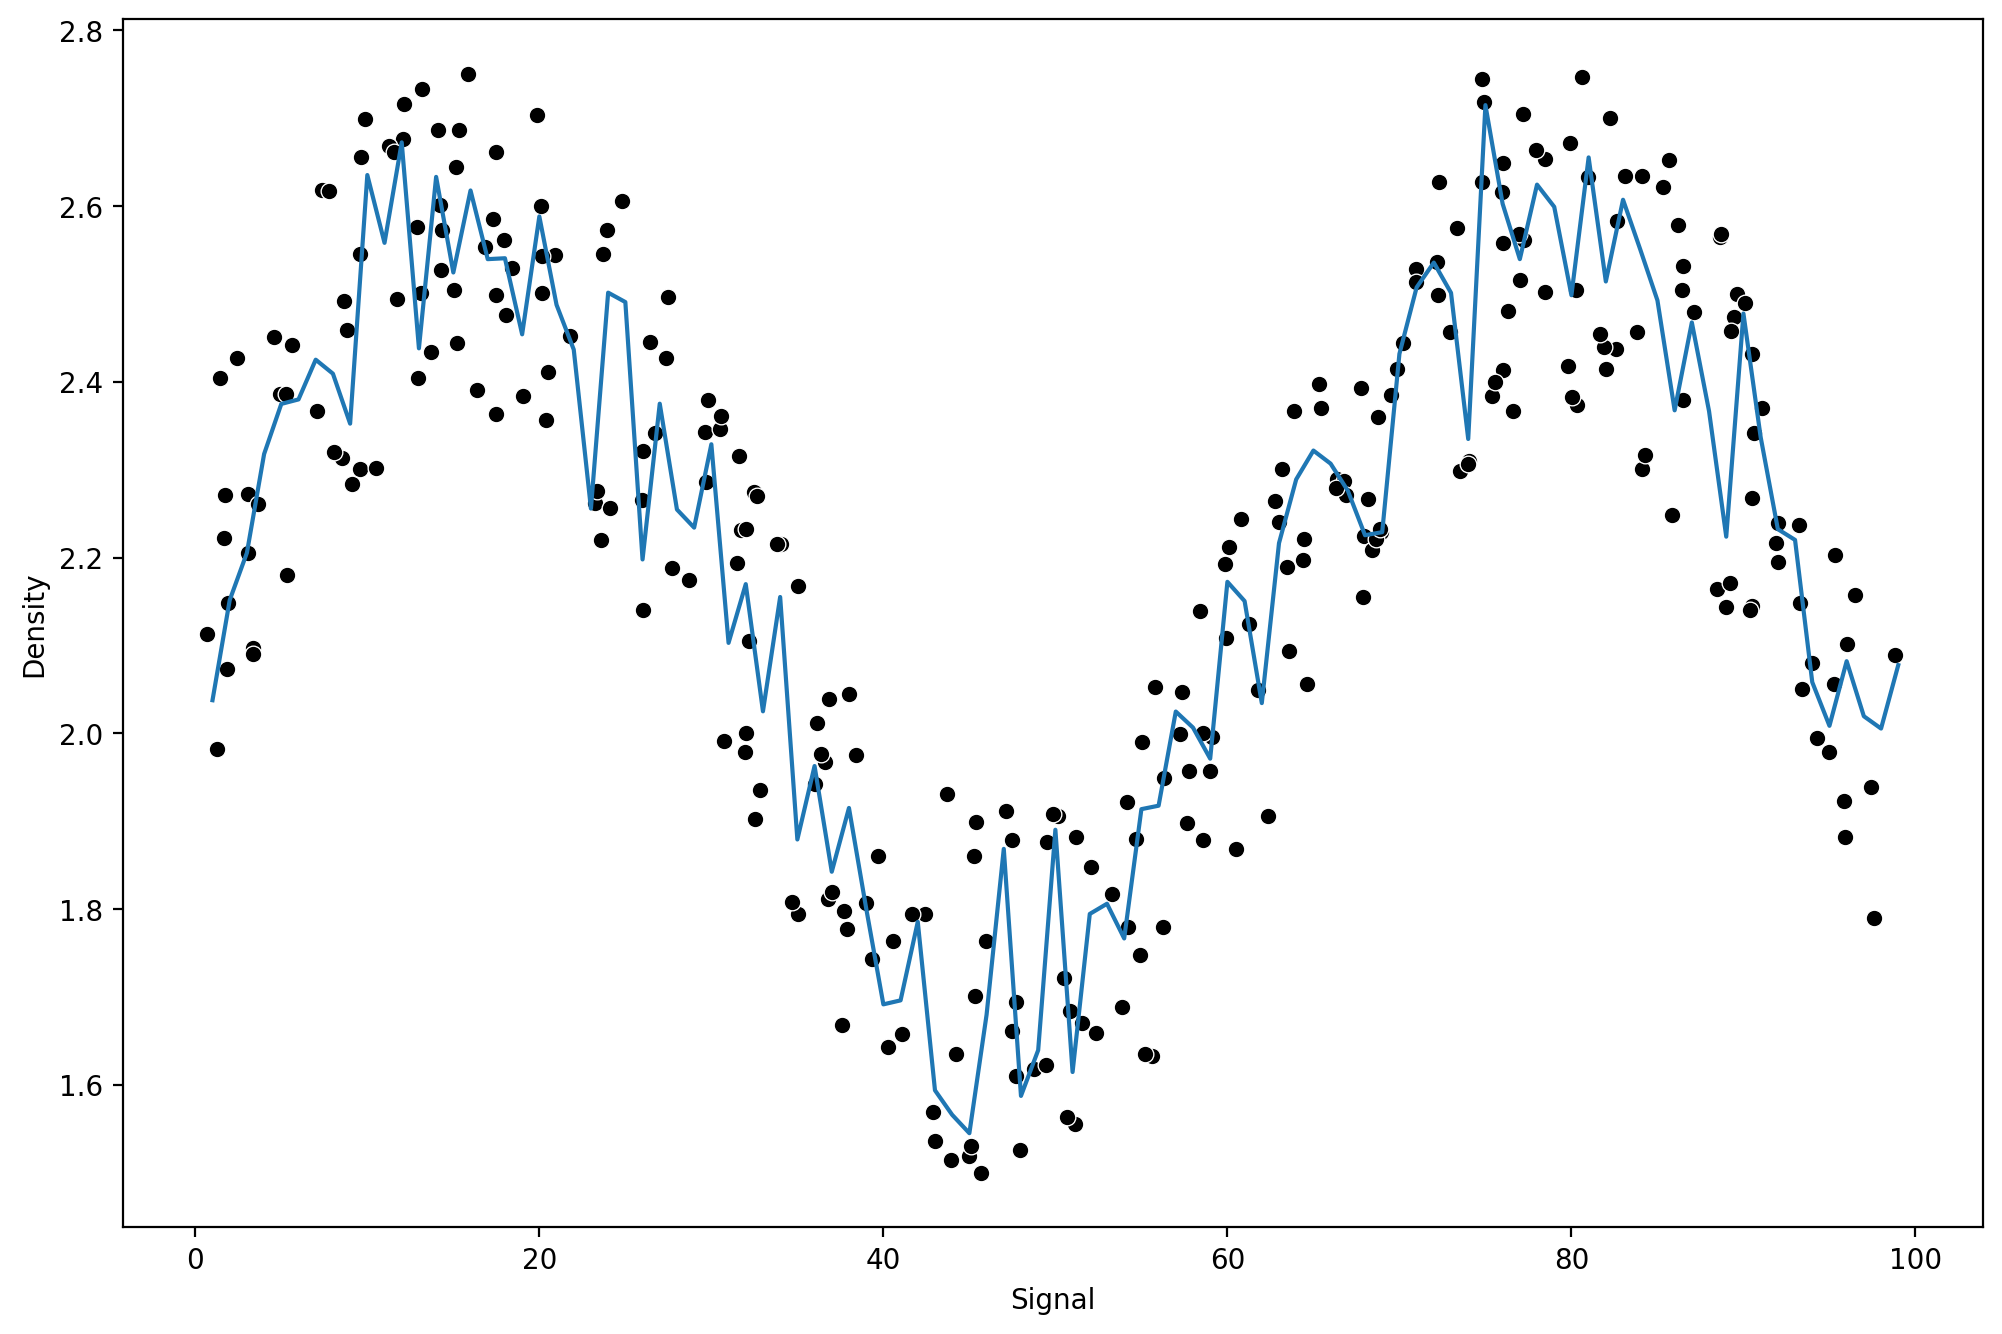

In [51]:
run_model(rfr,X_train,y_train,X_test,y_test)

## Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


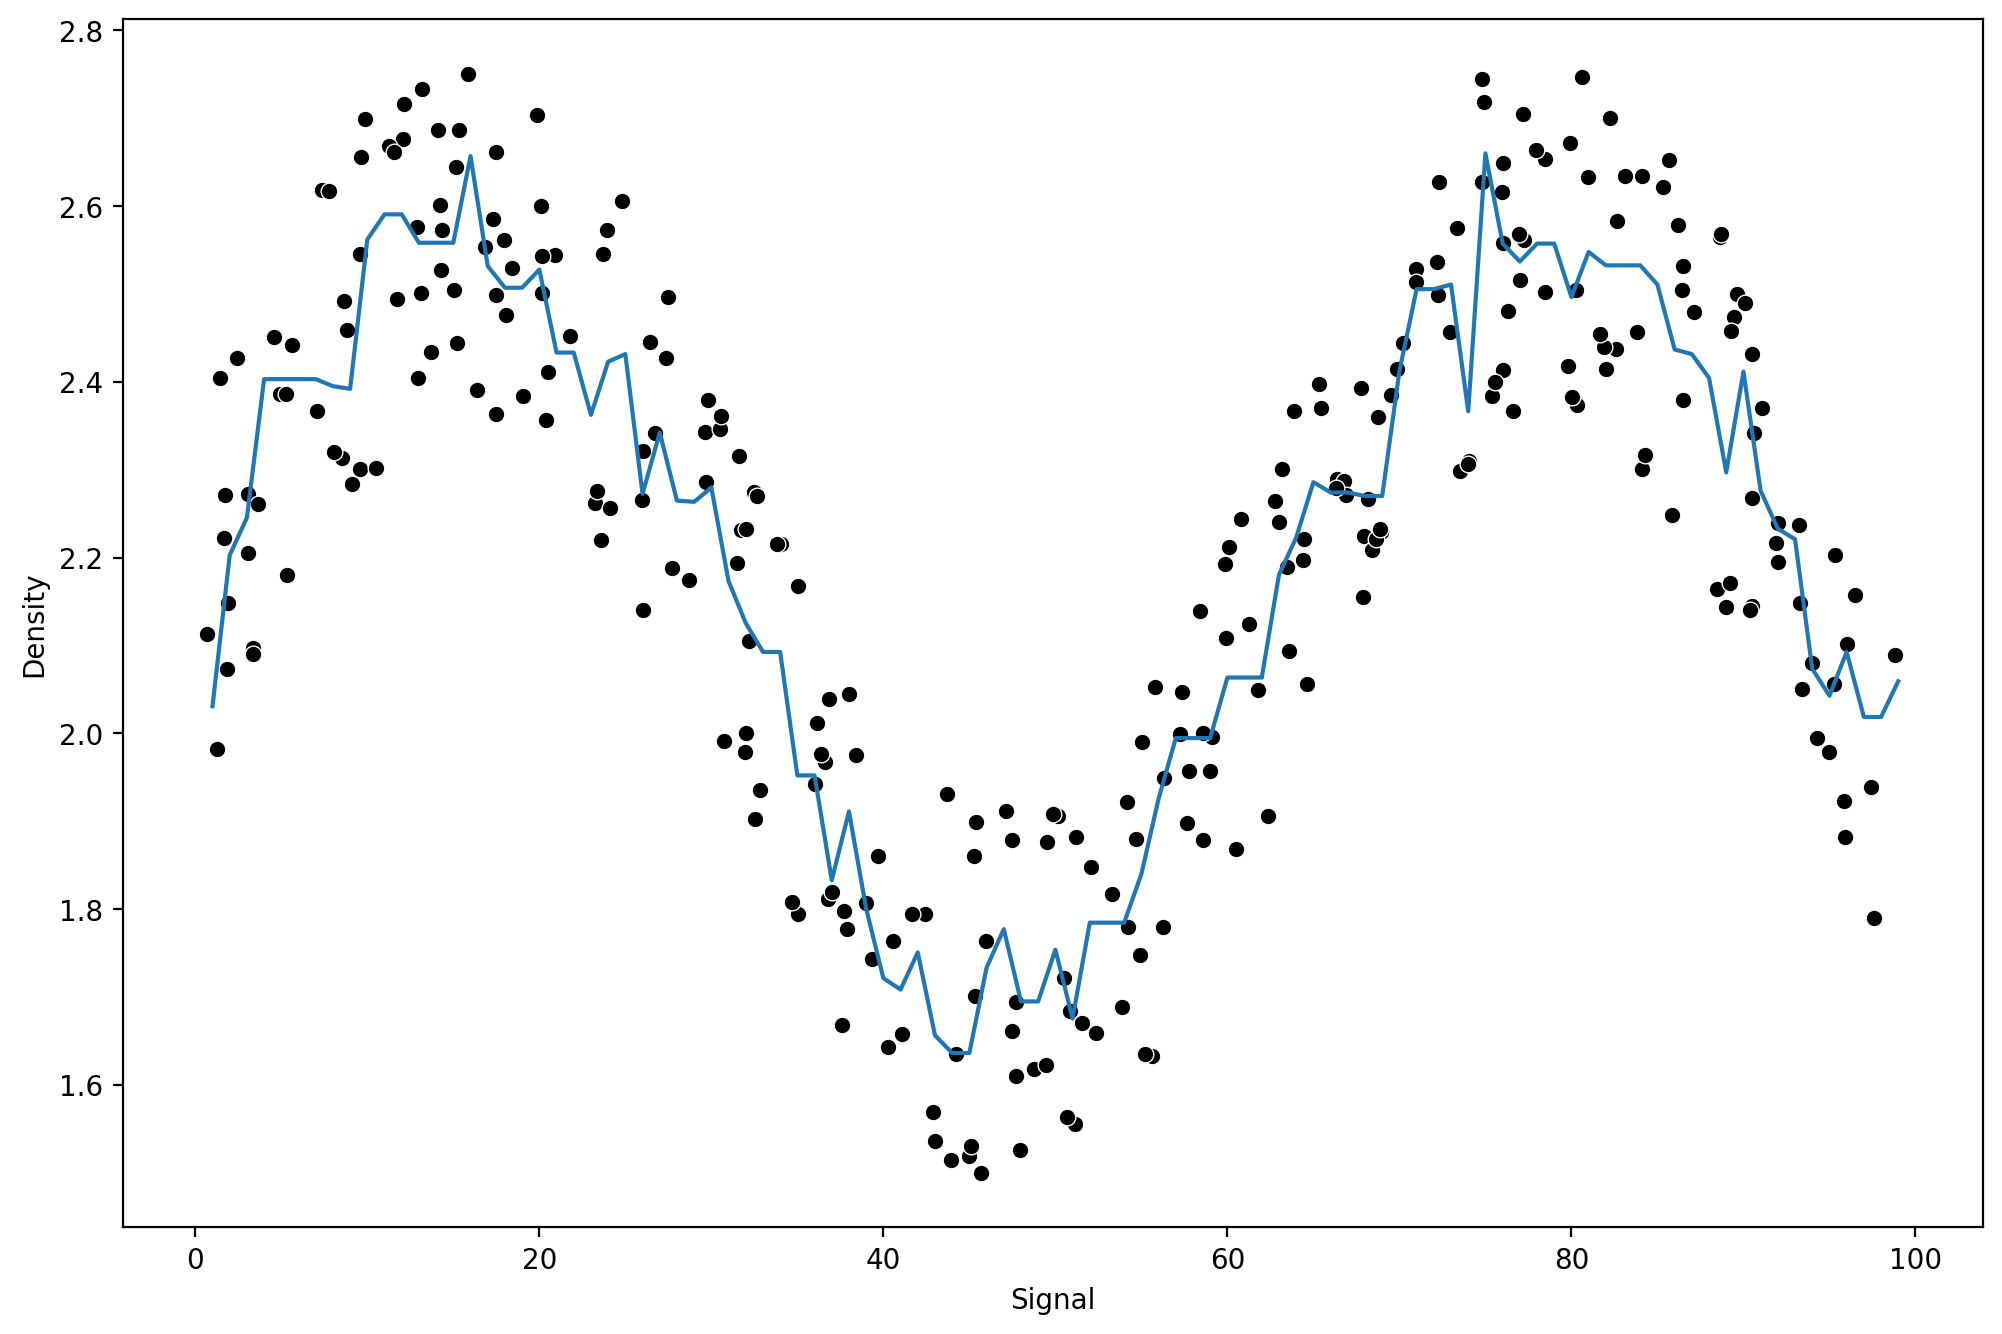

In [56]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

MAE: 0.11872287549827973
RMSE: 0.1428742380209167


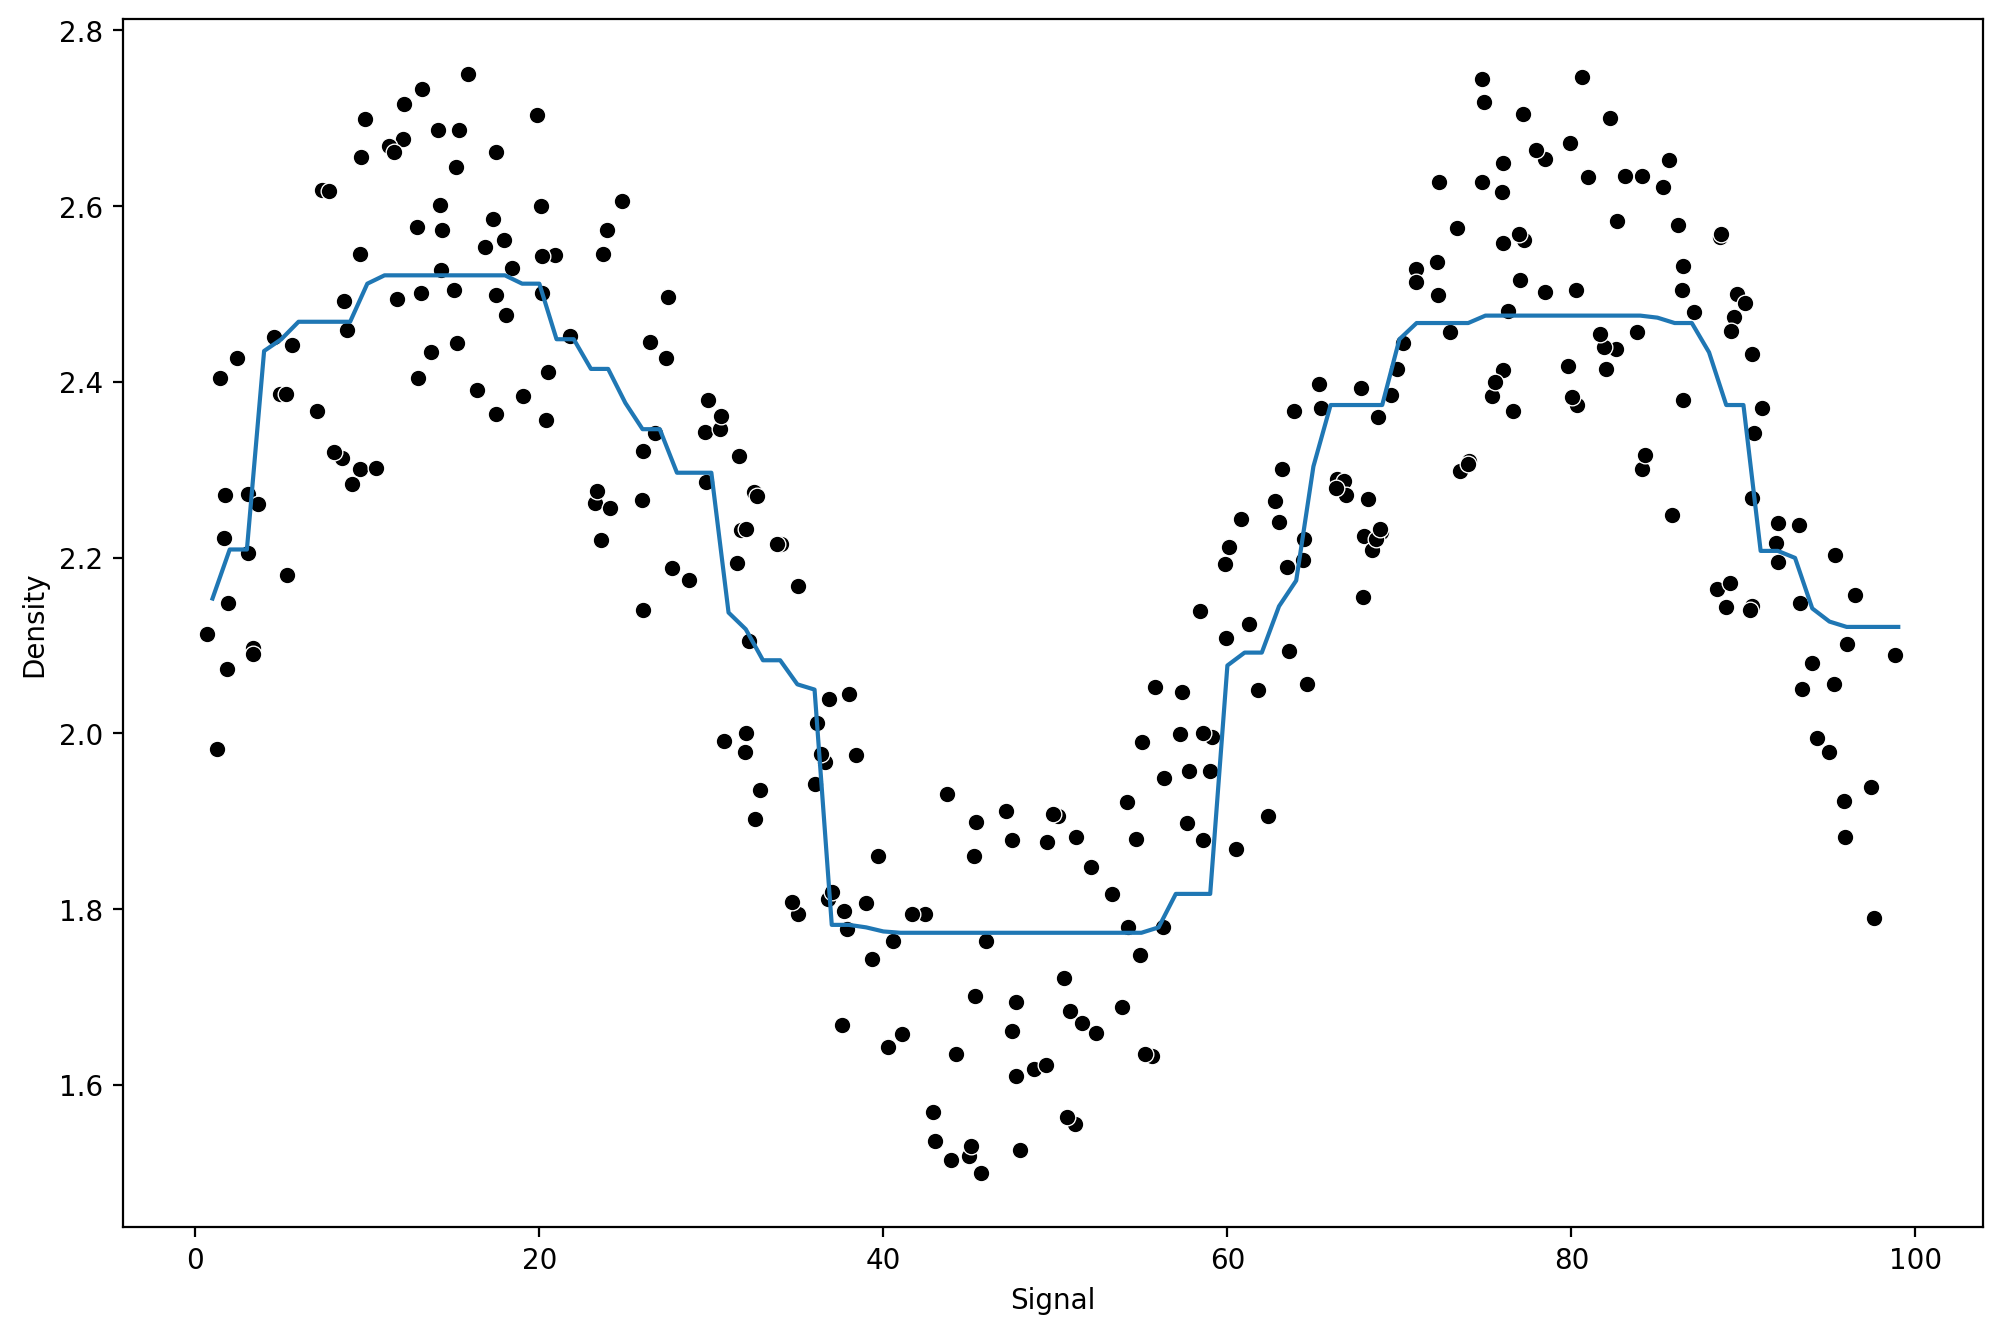

In [57]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)